In [1]:
import sys
import h2o
import math

In [2]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.3" 2019-04-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.3+12-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.3+12-LTS, mixed mode)
  Starting server from /home/praveen/miniconda3/envs/h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7wnl2ntl
  JVM stdout: /tmp/tmp7wnl2ntl/h2o_praveen_started_from_python.out
  JVM stderr: /tmp/tmp7wnl2ntl/h2o_praveen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,07 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,2 months and 13 days
H2O cluster name:,H2O_from_python_praveen_wtobd5
H2O cluster total nodes:,1
H2O cluster free memory:,2.934 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"



<br/>
<div align='center'><b>Data sourcing</b></div>
<br/>


In [3]:
data_path = "https://s3.amazonaws.com/h2o-public-test-data/bigdata/laptop/citibike-nyc/31081_New_York_City__Hourly_2013.csv"
weather_data = h2o.import_file(data_path, destination_frame = "weather_raw")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
weather_data["Month Local"].table()

Month Local,Count
1,744
2,672
3,744
4,720
5,744
6,720
7,744
8,744
9,720
10,744


In [45]:
weather_data["temp_f"] = weather_data["Temperature (C)"]*1.8+32

In [46]:
weather_data[(weather_data["temp_f"]==float('nan'))]

Year Local,Month Local,Day Local,Hour Local,Year UTC,Month UTC,Day UTC,Hour UTC,Cavok Reported,Cloud Ceiling (m),Cloud Cover Fraction,Cloud Cover Fraction 1,Cloud Cover Fraction 2,Cloud Cover Fraction 3,Cloud Cover Fraction 4,Cloud Cover Fraction 5,Cloud Cover Fraction 6,Cloud Height (m) 1,Cloud Height (m) 2,Cloud Height (m) 3,Cloud Height (m) 4,Cloud Height (m) 5,Cloud Height (m) 6,Dew Point (C),Humidity Fraction,Precipitation One Hour (mm),Pressure Altimeter (mbar),Pressure Sea Level (mbar),Pressure Station (mbar),Snow Depth (cm),Temperature (C),Visibility (km),Weather Code 1,Weather Code 1/ Description,Weather Code 2,Weather Code 2/ Description,Weather Code 3,Weather Code 3/ Description,Weather Code 4,Weather Code 4/ Description,Weather Code 5,Weather Code 5/ Description,Weather Code 6,Weather Code 6/ Description,Weather Code Most Severe / Icon Code,Weather Code Most Severe,Weather Code Most Severe / Description,Wind Direction (degrees),Wind Gust (m/s),Wind Speed (m/s),temp_f
2013,1,2,3,2013,1,2,8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,2,6,1,2013,2,6,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,2,6,3,2013,2,6,8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,3,9,1,2013,3,9,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,3,10,3,2013,3,10,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,3,12,8,2013,3,12,12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,3,25,23,2013,3,26,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,6,1,16,2013,6,1,20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,8,15,20,2013,8,16,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan
2013,8,16,5,2013,8,16,9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,nan,nan


In [40]:
#Impute not needed/efficient at this stage since we will be using aggregated data below
#weather_imputed = weather_data.impute('temp_f', method='mean', by = ["Year Local", "Month Local", "Day Local"])

In [47]:
weather_data.describe()

Rows:8760
Cols:51




,Year Local,Month Local,Day Local,Hour Local,Year UTC,Month UTC,Day UTC,Hour UTC,Cavok Reported,Cloud Ceiling (m),Cloud Cover Fraction,Cloud Cover Fraction 1,Cloud Cover Fraction 2,Cloud Cover Fraction 3,Cloud Cover Fraction 4,Cloud Cover Fraction 5,Cloud Cover Fraction 6,Cloud Height (m) 1,Cloud Height (m) 2,Cloud Height (m) 3,Cloud Height (m) 4,Cloud Height (m) 5,Cloud Height (m) 6,Dew Point (C),Humidity Fraction,Precipitation One Hour (mm),Pressure Altimeter (mbar),Pressure Sea Level (mbar),Pressure Station (mbar),Snow Depth (cm),Temperature (C),Visibility (km),Weather Code 1,Weather Code 1/ Description,Weather Code 2,Weather Code 2/ Description,Weather Code 3,Weather Code 3/ Description,Weather Code 4,Weather Code 4/ Description,Weather Code 5,Weather Code 5/ Description,Weather Code 6,Weather Code 6/ Description,Weather Code Most Severe / Icon Code,Weather Code Most Severe,Weather Code Most Severe / Description,Wind Direction (degrees),Wind Gust (m/s),Wind Speed (m/s),temp_f
type,int,int,int,int,int,int,int,int,int,real,real,real,real,real,int,int,int,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,int,enum,int,enum,int,enum,int,enum,int,enum,int,enum,int,int,enum,int,real,real,real
mins,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,0.0,0.0,61.0,0.0,0.0,0.25,0.5,NaN,NaN,NaN,60.96,243.84,426.72,NaN,NaN,NaN,-22.2,0.1495,0.0,984.6493,NaN,NaN,NaN,-11.7,0.4023,1.0,,1.0,,1.0,,1.0,,1.0,,3.0,,0.0,1.0,,10.0,7.2,0.0,10.940000000000001
mean,2013.0,6.526027397260274,15.720547945205476,11.500000000000004,2013.0005707762557,6.525114155251141,15.72134703196347,11.500114155251142,0.0,1313.0120192307695,0.40708152049461876,0.3495019464163042,0.865257104194858,0.958720930232558,0.0,0.0,0.0,1289.618551531574,1647.7553803112314,2109.086024612403,0.0,0.0,0.0,4.8087215291289915,0.6071889321277325,1.3140266666666667,1018.1397621380335,0.0,0.0,0.0,12.802312006409522,14.326599313265422,5.036226415094339,,4.1160541586073505,,3.4972067039106145,,2.490196078431373,,2.3333333333333335,,3.0,,1.528310502283105,5.036226415094339,,199.22801147227534,9.496722017220174,2.439591663637464,55.04416161153715
maxs,2013.0,12.0,31.0,23.0,2014.0,12.0,31.0,23.0,0.0,3657.6,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3657.5999,3657.5999,3657.5999,NaN,NaN,NaN,24.4,1.0,26.924,1042.2113,NaN,NaN,NaN,36.1,16.0934,40.0,,60.0,,36.0,,27.0,,3.0,,3.0,,16.0,40.0,,360.0,20.58,10.8,96.98
sigma,0.0,3.4480481340692424,8.796749115212306,6.922581688234341,0.023885468333801296,3.4479224612123063,8.795911359231582,6.922499226031305,0.0,983.9837834758466,0.4592627865460921,0.42160673911513524,0.2021272320644814,0.10097347353236513,-0.0,-0.0,-0.0,941.0299969649625,898.3293913238305,907.4522018513926,-0.0,-0.0,-0.0,10.86120854804035,0.1839562249286177,2.6101039694258272,7.438238180444408,-0.0,-0.0,-0.0,9.88983916182101,3.624788000276402,5.388407968229686,,7.032184696768441,,6.846121104401717,,3.976795438639548,,1.0,,0.0,,4.3132955690507835,5.388407968229686,,104.09521202667845,1.904359860684349,1.6281704566349176,17.801710491277824
zeros,0,0,0,365,0,0,0,365,8737,0,4508,4508,0,0,0,0,0,0,0,0,0,0,0,138,0,272,0,0,0,0,136,0,0,,0,,0,,0,,0,,0,,7435,0,,0,0,1340,0
missing,0,0,0,0,0,0,0,0,23,5432,26,26,7282,8244,8760,8760,8760,4516,7282,8244,8760,8760,8760,23,23,7860,23,8760,8760,8760,23,23,7435,7435,8243,8243,8581,8581,8709,8709,8751,8751,8758,8758,0,7435,7435,4576,7134,507,23
0,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,5.0,0.0,2895.6,1.0,0.9,1.0,nan,nan,nan,nan,2895.5999,3352.8,nan,nan,nan,nan,-5.0,0.5447,nan,1013.0917,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,nan,nan,2.57,37.94
1,2013.0,1.0,1.0,1.0,2013.0,1.0,1.0,6.0,0.0,3048.0,1.0,1.0,nan,nan,nan,nan,nan,3048.0,nan,nan,nan,nan,nan,-4.4,0.5463,nan,1012.0759,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,260.0,9.77,4.63,39.019999999999996
2,2013.0,1.0,1.0,2.0,2013.0,1.0,1.0,7.0,0.0,1828.8,1.0,1.0,nan,nan,nan,nan,nan,1828.7999,nan,nan,nan,nan,nan,-3.3,0.619,nan,1012.4145,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0

<br/>
<div align='center'><b>Aggregation</b></div>
<br/>

In [48]:
data_grouped = weather_data.group_by(by=["Month Local","Day Local"])
data_grouped.mean("temp_f", na='all')
data_grouped.min("temp_f", na='all')
data_grouped.max("temp_f", na='all')

GroupBy: 
  Frame: py_18_sid_b8e0; by=[1, 2]
  Aggregates: dict_keys(['mean_temp_f', 'min_temp_f', 'max_temp_f'])
*** Use get_frame() to get groupby frame ***


In [49]:
data_grouped.get_frame()#.describe()

Month Local,Day Local,mean_temp_f,min_temp_f,max_temp_f
1,1,36.5,26.96,39.02
1,2,nan,nan,nan
1,3,28.5275,24.08,32
1,4,34.0325,30.92,37.04
1,5,36.4625,32,42.08
1,6,39.1625,33.98,44.96
1,7,40.5725,37.94,44.06
1,8,41.2475,35.96,46.94
1,9,44.3525,39.02,48.92
1,10,43.565,41,46.94


<br/>
<div align='center'><b>Visualization</b></div>
<br/>

In [50]:
import pandas as pd
data_pd = data_grouped.get_frame().as_data_frame()

In [60]:
#finding na values and filling them
data_pd = data_pd.fillna(method='ffill')
data_pd.loc[data_pd['mean_temp_f'].isna()]

,Month Local,Day Local,mean_temp_f,min_temp_f,max_temp_f


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

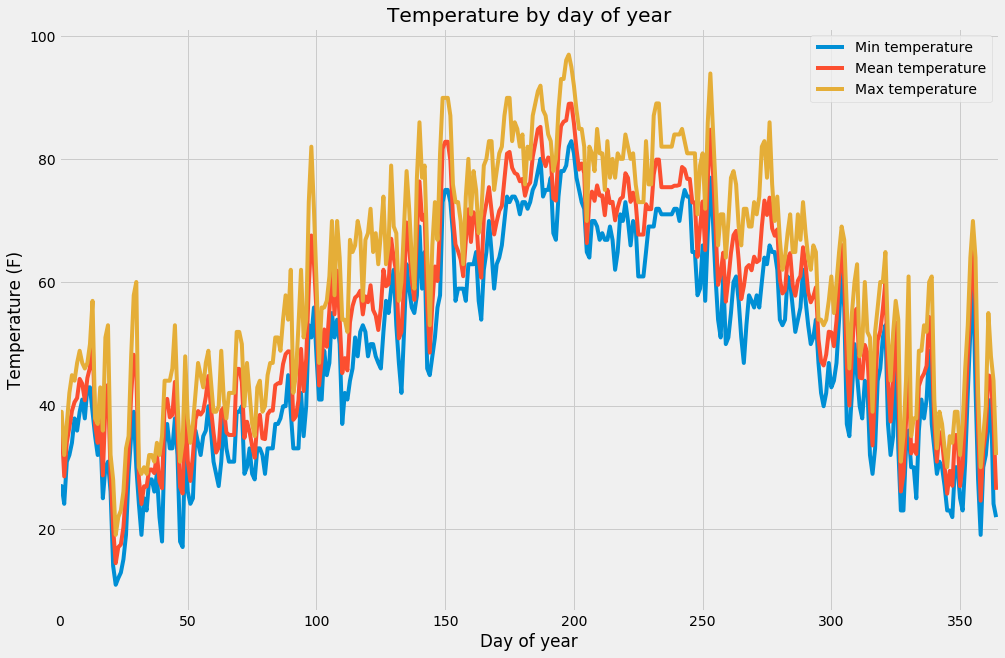

In [62]:
#graph = data_pd.plot()
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
#fig.subplots_adjust(wspace=1,hspace=10)
ax1 = fig.add_subplot(111)
ax1.set(title='Temperature by day of year', ylabel='Temperature (F)', xlabel='Day of year')
ax1.set_xlim((0,365))
ax1.plot(data_pd.index, data_pd['min_temp_f'], label='Min temperature')
ax1.plot(data_pd.index, data_pd['mean_temp_f'], label='Mean temperature')
ax1.plot(data_pd.index, data_pd['max_temp_f'], label='Max temperature')
ax1.legend(loc='best')
plt.show()



<b>What month/day was the coldest in NYC?</b>


In [63]:
data_pd[(data_pd.min_temp_f == data_pd['min_temp_f'].min())]

,Month Local,Day Local,mean_temp_f,min_temp_f,max_temp_f
22,1,23,14.45,10.94,19.04



<b>What month/day was the hottest in NYC?</b>


In [64]:
data_pd[(data_pd.max_temp_f == data_pd['max_temp_f'].max())]

,Month Local,Day Local,mean_temp_f,min_temp_f,max_temp_f
198,7,18,88.9925,82.04,96.98


In [26]:
#h2o.cluster().shutdown()